# STIPS Advanced Tutorial I – Further Observations (Noise and Distortion)

The contents of this notebook assume both that you already have STIPS installed (see [Installing STIPS](https://stsci-stips.readthedocs.io/en/latest/installation.html) if not) and that you are comfortable with basic usage of STIPS functionalities (see [STIPS Basic Tutorial](https://stips.readthedocs.io/en/latest/basic_tutorial.html), or the Basic Tutorial notebook, if not).  Procedures in this tutorial will use scenes generated by the Basic Tutorial to explore further STIPS functionalities.

## Checking STIPS Import

Before beginning, check again that the STIPS import is correct and configure and import and configure pyplot.

In [97]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib
from matplotlib import style
matplotlib.rcParams['axes.grid'] = False
matplotlib.rcParams['image.origin'] = 'lower'
import matplotlib.pyplot as plt
from astropy.io import fits

import stips

print(stips.__env__report__)

STIPS Version 2.0.0 with Data Version 1.0.9 at /Users/halkowsi/STScI-STIPS/ref_data/stips_data.
	STIPS Grid Generated with 1.0.8
Pandeia Version 1.7 with Data Version 1.7 at /Users/halkowsi/STScI-STIPS/ref_data/pandeia_data-1.7_roman.
Webbpsf Version 1.0.0 with Data Version 1.0.0 at /Users/halkowsi/STScI-STIPS/ref_data/webbpsf-data.



## Generating a Smaller Scene

To better see the scope of possible observations, we will generate a scene smaller in scale than in the Basic Tutorial –– we do that below, following the same procedure as before.  The specifications of our scene are as follows:

* A stellar population representing a globular cluster with
  * 100 stars
  * An age of 7.5 billion years
  * A metallicity of -2.0
  * A Salpeter IMF with alpha=-2.35
  * A binary fraction of 10%
  * A clustered distribution (higher-mass stars closer to the population centre)
  * An inverse power-law distribution
  * A radius of 100 parsecs
  * A distance of 10 kpc
  * No offset from the centre of the scene being created
* A collection of background galaxies with
  * 2 galaxies
  * Redshifts between 0 and 0.2
  * Radii between 0.01 and 2.0 arcsec
  * V-band surface brightness magnitudes between 28 and 25
  * Uniform spatial distribution (unclustered) over 200 arcsec
  * No offset from the centre of the scene being created

In [98]:
obs_prefix = 'adv_notebook'
obs_ra = 150.0
obs_dec = -2.5

In [99]:
from stips.scene_module import SceneModule

scm = SceneModule(out_prefix=obs_prefix, ra=obs_ra, dec=obs_dec)

stellar_parameters = {
                      'n_stars': 100,
                      'age_low': 7.5e12, 
                      'age_high': 7.5e12,
                      'z_low': -2.0, 
                      'z_high': -2.0,
                      'imf': 'salpeter', 
                      'alpha': -2.35,
                      'binary_fraction': 0.1,
                      'clustered': True,
                      'distribution': 'invpow',
                      'radius': 100.0, 
                      'radius_units': 'pc',
                      'distance_low': 10.0, 
                      'distance_high': 10.0,
                      'offset_ra': 0.0, 
                      'offset_dec': 0.0
                     }

stellar_cat_file = scm.CreatePopulation(stellar_parameters)
print("Stellar population saved to file {}".format(stellar_cat_file))

galaxy_parameters = {
                     'n_gals': 2,
                     'z_low': 0.0, 
                     'z_high': 0.2,
                     'rad_low': 0.01, 
                     'rad_high': 2.0,
                     'sb_v_low': 28.0, 
                     'sb_v_high': 25.0,
                     'distribution': 'uniform', 
                     'clustered': False,
                     'radius': 200.0, 
                     'radius_units': 'arcsec',
                     'offset_ra': 0.0, 
                     'offset_dec': 0.0
                    }

galaxy_cat_file = scm.CreateGalaxies(galaxy_parameters)
print("Galaxy population saved to file {}".format(galaxy_cat_file))

2022-11-05 14:02:25,484 INFO: Creating catalogue /Users/halkowsi/STScI-STIPS/notebooks/adv_notebook_stars_000.fits
2022-11-05 14:02:25,484 INFO: Creating age and metallicity numbers
2022-11-05 14:02:25,485 INFO: Created age and metallicity numbers
2022-11-05 14:02:25,486 INFO: Creating stars
2022-11-05 14:02:25,486 INFO: Age 1.35e+10
2022-11-05 14:02:25,487 INFO: Metallicity -2.000000
2022-11-05 14:02:25,488 INFO: Creating 100 stars


Log level: INFO


2022-11-05 14:02:25,873 INFO: Creating 100 objects, max radius 100.0, function invpow, scale 2.8
2022-11-05 14:02:25,956 INFO: Chunk 1: 106 stars
2022-11-05 14:02:25,978 INFO: Done creating catalogue
2022-11-05 14:02:25,979 INFO: Creating catalogue /Users/halkowsi/STScI-STIPS/notebooks/adv_notebook_gals_000.fits
2022-11-05 14:02:25,980 INFO: Wrote preamble
2022-11-05 14:02:25,980 INFO: Parameters are: {'n_gals': 2, 'z_low': 0.0, 'z_high': 0.2, 'rad_low': 0.01, 'rad_high': 2.0, 'sb_v_low': 28.0, 'sb_v_high': 25.0, 'distribution': 'uniform', 'clustered': False, 'radius': 200.0, 'radius_units': 'arcsec', 'offset_ra': 0.0, 'offset_dec': 0.0}
2022-11-05 14:02:25,982 INFO: Making Co-ordinates
2022-11-05 14:02:25,982 INFO: Creating 2 objects, max radius 200.0, function uniform, scale 2.8
2022-11-05 14:02:25,983 INFO: Converting Co-ordinates into RA,DEC
2022-11-05 14:02:26,003 INFO: Done creating catalogue


Stellar population saved to file /Users/halkowsi/STScI-STIPS/notebooks/adv_notebook_stars_000.fits
Galaxy population saved to file /Users/halkowsi/STScI-STIPS/notebooks/adv_notebook_gals_000.fits


## Observations

With the scene now created, we can move forward with our observations.  For the purpose of seeing multiple observation styles, we'll run through a series of observations, with the following parameters.  This is meant to demonstrate the range of STIPS observation capabilities –– there are, of course, a great many possibilities for other observations, and this is only a small sample of options.  We will leave all other parameters unchanged beyond the specified modifications in each observation.  We will begin with the observation setup used in the Basic Tutorial, and compare other observations against that.

### Observation I: Offset Modifications

* Offset of 10 degrees in RA
* Rotation of 27 degrees

### Observation II: Other Residuals

* Flat residuals –– True
* Dark residauls –– True
* Cosmic residuals –– True
* Poisson residuals –– False
* Readnoise residuals –– False

### Observation III: Distortions and Exposures

#### III.1

* Introduce distortion

#### III.2

* Increase exposure time to 5000

#### III.3 

* Decrease exposure time to 100

## Basic Tutorial Observation

In [105]:
from stips.observation_module import ObservationModule

offset = {
          'offset_id': 1,
          'offset_centre': False,
          'offset_ra': 0.0,
          'offset_dec': 0.0,
          'offset_pa': 0.0
         }

residuals = {
             'residual_flat': False,
             'residual_dark': False,
             'residual_cosmic': False,
             'residual_poisson': True,
             'residual_readnoise': True,
            }

observation_parameters = {
                          'instrument': 'WFI',
                          'filters': ['F129'],
                          'detectors': 1,
                          'distortion': False,
                          'background': 0.15,
                          'observations_id': 1,
                          'exptime': 1000,
                          'offsets': [offset]
                         }

obm = ObservationModule(observation_parameters, out_prefix=obs_prefix, ra=obs_ra, dec=obs_dec, residuals=residuals)

obm.nextObservation()

output_stellar_catalogues = obm.addCatalogue(stellar_cat_file)
output_galaxy_catalogues = obm.addCatalogue(galaxy_cat_file)

psf_file = obm.addError()

fits_file, mosaic_file, params = obm.finalize(mosaic=False)

2022-11-05 14:07:00,206 INFO: Got offsets as [{'offset_id': 1, 'offset_centre': False, 'offset_ra': 0.0, 'offset_dec': 0.0, 'offset_pa': 0.0}]
2022-11-05 14:07:00,258 INFO: Adding observation with filter F129 and offset (0.0,0.0,0.0)
2022-11-05 14:07:00,259 INFO: Added 1 observations
2022-11-05 14:07:00,261 INFO: WFI with 1 detectors. Central offset (0.0, 0.0, 0.0)
2022-11-05 14:07:00,262 INFO: Initializing Observation 0 of 1
2022-11-05 14:07:00,262 INFO: Observation Filter is F129
2022-11-05 14:07:00,263 INFO: Observation (RA,DEC) = (150.0,-2.5) with PA=0.0
2022-11-05 14:07:00,264 INFO: Resetting
2022-11-05 14:07:00,265 INFO: Returning background 0.15.
2022-11-05 14:07:00,265 INFO: Creating Detector SCA01 with (RA,DEC,PA) = (150.0,-2.5,0.0)
2022-11-05 14:07:00,266 INFO: Creating Detector SCA01 with offset (0.0,0.0)
2022-11-05 14:07:00,319 INFO: Creating Instrument with Configuration {'aperture': 'imaging', 'disperser': None, 'filter': 'f129', 'instrument': 'wfi', 'mode': 'imaging'}
20

Creating pandeia instrument roman.wfi.imaging


2022-11-05 14:07:00,514 INFO: Detector SCA01 created
2022-11-05 14:07:00,514 INFO: Reset Instrument
2022-11-05 14:07:00,515 INFO: Running catalogue /Users/halkowsi/STScI-STIPS/notebooks/adv_notebook_stars_000.fits
2022-11-05 14:07:00,516 INFO: Adding catalogue /Users/halkowsi/STScI-STIPS/notebooks/adv_notebook_stars_000.fits
2022-11-05 14:07:00,533 INFO: Converting phoenix catalogue
2022-11-05 14:07:00,533 INFO: Preparing output table
2022-11-05 14:07:00,567 INFO: Converting chunk 2
2022-11-05 14:07:00,568 INFO: Converting Phoenix Table to Internal format
2022-11-05 14:07:00,569 INFO: 1 datasets
2022-11-05 14:07:00,958 INFO: Finished converting catalogue to internal format
2022-11-05 14:07:00,959 INFO: Adding catalogue to detector SCA01
2022-11-05 14:07:00,960 INFO: Adding catalogue adv_notebook_stars_000_01_conv_F129.fits to AstroImage SCA01
2022-11-05 14:07:00,997 INFO: Determining pixel co-ordinates
2022-11-05 14:07:00,998 INFO: Keeping 45 items
2022-11-05 14:07:01,000 INFO: Writing

2022-11-05 14:07:22,068 INFO: Finishing Sersic Profiles at Sat Nov  5 14:07:22 2022
2022-11-05 14:07:22,118 INFO: Added catalogue adv_notebook_gals_000_01_conv_F129.fits to AstroImage SCA01
2022-11-05 14:07:22,119 INFO: Finished catalogue /Users/halkowsi/STScI-STIPS/notebooks/adv_notebook_gals_000.fits
2022-11-05 14:07:22,121 INFO: Adding Error
2022-11-05 14:07:22,122 INFO: Adding residual error
2022-11-05 14:07:22,199 INFO: SCA01: (RA, DEC, PA) := (0.0, 0.0, 0.0), detected as (0.0, 0.0, 0.0)
2022-11-05 14:07:22,521 INFO: SCA01: (RA, DEC, PA) := (0.0, 0.0, 0.0), detected as (0.0, 0.0, 0.0)
2022-11-05 14:07:22,522 INFO: Created AstroImage SCA01 and imported data from FITS file err_flat_wfi.fits
2022-11-05 14:07:22,579 INFO: SCA01: (RA, DEC, PA) := (0.0, 0.0, 0.0), detected as (0.0, 0.0, 0.0)
2022-11-05 14:07:22,890 INFO: SCA01: (RA, DEC, PA) := (0.0, 0.0, 0.0), detected as (0.0, 0.0, 0.0)
2022-11-05 14:07:22,891 INFO: Created AstroImage SCA01 and imported data from FITS file err_rdrk_wf

<Figure size 432x288 with 0 Axes>

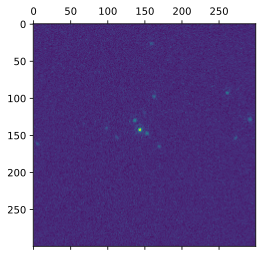

In [106]:
with fits.open(fits_file) as result_file:
    result_data = result_file[1].data
    
crop_result_data = result_data[1900:2200, 1900:2200]

fig1 = plt.figure()
im = plt.matshow(crop_result_data)

## Observation I

In [133]:
from stips.observation_module import ObservationModule

offset_1 = {
          'offset_id': 1,
          'offset_centre': False,
          'offset_ra': 40.0,
          'offset_dec': 20.0,
          'offset_pa': 27.0
         }


residuals_1 = {
             'residual_flat': False,
             'residual_dark': False,
             'residual_cosmic': False,
             'residual_poisson': True,
             'residual_readnoise': True
            }


observation_parameters_1 = {
                          'instrument': 'WFI',
                          'filters': ['F129'],
                          'detectors': 1,
                          'distortion': False,
                          'background': 0.15,
                          'observations_id': 1,
                          'exptime': 1000,
                          'offsets': [offset]
                         }

obm_1 = ObservationModule(observation_parameters_1, out_prefix=obs_prefix, ra=obs_ra, dec=obs_dec, residual=residuals_1)

obm_1.nextObservation()

2022-11-05 14:18:56,850 INFO: Got offsets as [{'offset_id': 1, 'offset_centre': False, 'offset_ra': 0.0, 'offset_dec': 0.0, 'offset_pa': 0.0}]
2022-11-05 14:18:56,886 INFO: Adding observation with filter F129 and offset (0.0,0.0,0.0)
2022-11-05 14:18:56,886 INFO: Added 1 observations
2022-11-05 14:18:56,889 INFO: WFI with 1 detectors. Central offset (0.0, 0.0, 0.0)
2022-11-05 14:18:56,889 INFO: Initializing Observation 0 of 1
2022-11-05 14:18:56,890 INFO: Observation Filter is F129
2022-11-05 14:18:56,890 INFO: Observation (RA,DEC) = (150.0,-2.5) with PA=0.0
2022-11-05 14:18:56,891 INFO: Resetting
2022-11-05 14:18:56,892 INFO: Returning background 0.15.
2022-11-05 14:18:56,893 INFO: Creating Detector SCA01 with (RA,DEC,PA) = (150.0,-2.5,0.0)
2022-11-05 14:18:56,894 INFO: Creating Detector SCA01 with offset (0.0,0.0)
2022-11-05 14:18:56,951 INFO: Creating Instrument with Configuration {'aperture': 'imaging', 'disperser': None, 'filter': 'f129', 'instrument': 'wfi', 'mode': 'imaging'}


Creating pandeia instrument roman.wfi.imaging


2022-11-05 14:18:57,154 INFO: SCA01: (RA, DEC, PA) := (150.0, -2.5, 0.0), detected as (150.0, -2.5, 0.0)
2022-11-05 14:18:57,155 INFO: Detector SCA01 created
2022-11-05 14:18:57,156 INFO: Reset Instrument


0

In [136]:
output_stellar_catalogues_1 = obm_1.addCatalogue(stellar_cat_file)
output_galaxy_catalogues_1 = obm_1.addCatalogue(galaxy_cat_file)

psf_file_1 = obm_1.addError()

fits_file_1, mosaic_file_1, params_1 = obm_1.finalize(mosaic=False)

2022-11-05 14:21:38,768 INFO: Running catalogue /Users/halkowsi/STScI-STIPS/notebooks/adv_notebook_stars_000.fits
2022-11-05 14:21:38,769 INFO: Adding catalogue /Users/halkowsi/STScI-STIPS/notebooks/adv_notebook_stars_000.fits
2022-11-05 14:21:38,787 INFO: Converting phoenix catalogue
2022-11-05 14:21:38,788 INFO: Preparing output table
2022-11-05 14:21:38,821 INFO: Converting chunk 2
2022-11-05 14:21:38,822 INFO: Converting Phoenix Table to Internal format
2022-11-05 14:21:38,823 INFO: 1 datasets
2022-11-05 14:21:39,244 INFO: Finished converting catalogue to internal format
2022-11-05 14:21:39,244 INFO: Adding catalogue to detector SCA01
2022-11-05 14:21:39,245 INFO: Adding catalogue adv_notebook_stars_000_01_conv_F129.fits to AstroImage SCA01
2022-11-05 14:21:39,288 INFO: Determining pixel co-ordinates
2022-11-05 14:21:39,289 INFO: Keeping 45 items
2022-11-05 14:21:39,290 INFO: Writing 45 stars
2022-11-05 14:21:39,291 INFO: Adding 45 point sources to AstroImage SCA01
2022-11-05 14:21

2022-11-05 14:22:01,111 INFO: Adding Error
2022-11-05 14:22:01,111 INFO: Adding residual error
2022-11-05 14:22:01,112 INFO: Adding error to detector SCA01
2022-11-05 14:22:01,113 INFO: Adding background
2022-11-05 14:22:01,113 INFO: Returning background 0.15.
2022-11-05 14:22:01,114 INFO: Background is 0.15 counts/s/pixel
2022-11-05 14:22:01,115 INFO: Returning background 0.15.
2022-11-05 14:22:01,116 INFO: Added background of 0.15 counts/s/pixel
2022-11-05 14:22:01,122 INFO: Inserting correct exposure time
2022-11-05 14:22:01,123 INFO: Cropping Down to base Detector Size
2022-11-05 14:22:01,123 INFO: Cropping convolved image down to detector size
2022-11-05 14:22:01,124 INFO: Taking [22:4110, 22:4110]
2022-11-05 14:22:01,141 INFO: SCA01: (RA, DEC, PA) := (150.0, -2.5, 0.0), detected as (150.0, -2.5, 0.0)
2022-11-05 14:22:01,145 INFO: Adding poisson noise
2022-11-05 14:22:01,731 INFO: Adding Poisson Noise with mean 0.0001269056787226865 and standard deviation 0.4180971605674833
2022-1

<Figure size 432x288 with 0 Axes>

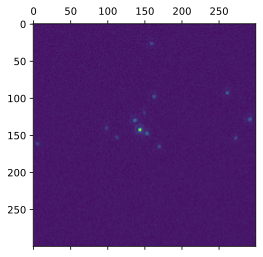

In [138]:
with fits.open(fits_file_1) as result_file_1:
    result_data_1 = result_file_1[1].data

crop_result_data_1 = result_data_1[1900:2200, 1900:2200]

fig_1 = plt.figure()
im_1 = plt.matshow(crop_result_data_1)

## Observation II

In [139]:
offset_2 = {
          'offset_id': 1,
          'offset_centre': False,
          'offset_ra': 0.0,
          'offset_dec': 0.0,
          'offset_pa': 0.0
         }


residuals_2 = {
             'residual_flat': True,
             'residual_dark': True,
             'residual_cosmic': True,
             'residual_poisson': False,
             'residual_readnoise': False
            }


observation_parameters_2 = {
                          'instrument': 'WFI',
                          'filters': ['F129'],
                          'detectors': 1,
                          'distortion': False,
                          'background': 0.15,
                          'observations_id': 1,
                          'exptime': 1000,
                          'offsets': [offset]
                         }

obm_2 = ObservationModule(observation_parameters_2, out_prefix=obs_prefix, ra=obs_ra, dec=obs_dec, residual=residuals_2)

obm_2.nextObservation()

2022-11-05 14:22:14,352 INFO: Got offsets as [{'offset_id': 1, 'offset_centre': False, 'offset_ra': 0.0, 'offset_dec': 0.0, 'offset_pa': 0.0}]
2022-11-05 14:22:14,387 INFO: Adding observation with filter F129 and offset (0.0,0.0,0.0)
2022-11-05 14:22:14,388 INFO: Added 1 observations
2022-11-05 14:22:14,390 INFO: WFI with 1 detectors. Central offset (0.0, 0.0, 0.0)
2022-11-05 14:22:14,391 INFO: Initializing Observation 0 of 1
2022-11-05 14:22:14,391 INFO: Observation Filter is F129
2022-11-05 14:22:14,392 INFO: Observation (RA,DEC) = (150.0,-2.5) with PA=0.0
2022-11-05 14:22:14,392 INFO: Resetting
2022-11-05 14:22:14,393 INFO: Returning background 0.15.
2022-11-05 14:22:14,393 INFO: Creating Detector SCA01 with (RA,DEC,PA) = (150.0,-2.5,0.0)
2022-11-05 14:22:14,394 INFO: Creating Detector SCA01 with offset (0.0,0.0)
2022-11-05 14:22:14,447 INFO: Creating Instrument with Configuration {'aperture': 'imaging', 'disperser': None, 'filter': 'f129', 'instrument': 'wfi', 'mode': 'imaging'}


Creating pandeia instrument roman.wfi.imaging


2022-11-05 14:22:14,658 INFO: SCA01: (RA, DEC, PA) := (150.0, -2.5, 0.0), detected as (150.0, -2.5, 0.0)
2022-11-05 14:22:14,659 INFO: Detector SCA01 created
2022-11-05 14:22:14,660 INFO: Reset Instrument


0

In [140]:
output_stellar_catalogues_2 = obm_2.addCatalogue(stellar_cat_file)
output_galaxy_catalogues_2 = obm_2.addCatalogue(galaxy_cat_file)

psf_file_2 = obm_2.addError()

fits_file_2, mosaic_file_2, params_2 = obm_2.finalize(mosaic=False)

2022-11-05 14:22:21,338 INFO: Running catalogue /Users/halkowsi/STScI-STIPS/notebooks/adv_notebook_stars_000.fits
2022-11-05 14:22:21,339 INFO: Adding catalogue /Users/halkowsi/STScI-STIPS/notebooks/adv_notebook_stars_000.fits
2022-11-05 14:22:21,355 INFO: Converting phoenix catalogue
2022-11-05 14:22:21,356 INFO: Preparing output table
2022-11-05 14:22:21,385 INFO: Converting chunk 2
2022-11-05 14:22:21,386 INFO: Converting Phoenix Table to Internal format
2022-11-05 14:22:21,386 INFO: 1 datasets
2022-11-05 14:22:21,848 INFO: Finished converting catalogue to internal format
2022-11-05 14:22:21,849 INFO: Adding catalogue to detector SCA01
2022-11-05 14:22:21,849 INFO: Adding catalogue adv_notebook_stars_000_01_conv_F129.fits to AstroImage SCA01
2022-11-05 14:22:21,910 INFO: Determining pixel co-ordinates
2022-11-05 14:22:21,911 INFO: Keeping 45 items
2022-11-05 14:22:21,912 INFO: Writing 45 stars
2022-11-05 14:22:21,913 INFO: Adding 45 point sources to AstroImage SCA01
2022-11-05 14:22

2022-11-05 14:22:44,476 INFO: Added catalogue adv_notebook_gals_000_01_conv_F129.fits to AstroImage SCA01
2022-11-05 14:22:44,477 INFO: Finished catalogue /Users/halkowsi/STScI-STIPS/notebooks/adv_notebook_gals_000.fits
2022-11-05 14:22:44,477 INFO: Adding Error
2022-11-05 14:22:44,478 INFO: Adding residual error
2022-11-05 14:22:44,538 INFO: SCA01: (RA, DEC, PA) := (0.0, 0.0, 0.0), detected as (0.0, 0.0, 0.0)
2022-11-05 14:22:44,871 INFO: SCA01: (RA, DEC, PA) := (0.0, 0.0, 0.0), detected as (0.0, 0.0, 0.0)
2022-11-05 14:22:44,872 INFO: Created AstroImage SCA01 and imported data from FITS file err_flat_wfi.fits
2022-11-05 14:22:44,931 INFO: SCA01: (RA, DEC, PA) := (0.0, 0.0, 0.0), detected as (0.0, 0.0, 0.0)
2022-11-05 14:22:45,222 INFO: SCA01: (RA, DEC, PA) := (0.0, 0.0, 0.0), detected as (0.0, 0.0, 0.0)
2022-11-05 14:22:45,223 INFO: Created AstroImage SCA01 and imported data from FITS file err_rdrk_wfi.fits
2022-11-05 14:22:45,237 INFO: Adding error to detector SCA01
2022-11-05 14:22

<Figure size 432x288 with 0 Axes>

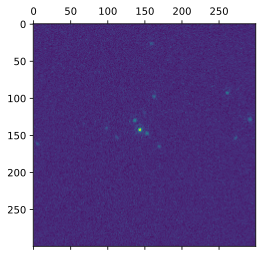

In [125]:
with fits.open(fits_file_2) as result_file_2:
    result_data_2 = result_file_2[1].data

crop_result_data_2 = result_data[1900:2200, 1900:2200]

fig_2 = plt.figure()
im_2 = plt.matshow(crop_result_data_2)

## Observation III.1

In [141]:
offset_3_1 = {
          'offset_id': 1,
          'offset_centre': False,
          'offset_ra': 0.0,
          'offset_dec': 0.0,
          'offset_pa': 0.0
         }


residuals_3_1 = {
             'residual_flat': False,
             'residual_dark': False,
             'residual_cosmic': False,
             'residual_poisson': True,
             'residual_readnoise': True
            }


observation_parameters_3_1 = {
                          'instrument': 'WFI',
                          'filters': ['F129'],
                          'detectors': 1,
                          'distortion': True,
                          'background': 0.15,
                          'observations_id': 1,
                          'exptime': 1000,
                          'offsets': [offset]
                         }

obm_3_1 = ObservationModule(observation_parameters_3_1, out_prefix=obs_prefix, ra=obs_ra, dec=obs_dec, residual=residuals_3_1)

obm_3_1.nextObservation()

2022-11-05 14:24:15,406 INFO: Got offsets as [{'offset_id': 1, 'offset_centre': False, 'offset_ra': 0.0, 'offset_dec': 0.0, 'offset_pa': 0.0}]
2022-11-05 14:24:15,441 INFO: Adding observation with filter F129 and offset (0.0,0.0,0.0)
2022-11-05 14:24:15,442 INFO: Added 1 observations
2022-11-05 14:24:15,444 INFO: WFI with 1 detectors. Central offset (0.0, 0.0, 0.0)
2022-11-05 14:24:15,445 INFO: Initializing Observation 0 of 1
2022-11-05 14:24:15,445 INFO: Observation Filter is F129
2022-11-05 14:24:15,446 INFO: Observation (RA,DEC) = (150.0,-2.5) with PA=0.0
2022-11-05 14:24:15,447 INFO: Resetting
2022-11-05 14:24:15,448 INFO: Returning background 0.15.
2022-11-05 14:24:15,448 INFO: Creating Detector SCA01 with (RA,DEC,PA) = (150.0,-2.5,0.0)
2022-11-05 14:24:15,449 INFO: Creating Detector SCA01 with offset (0.0,0.0)
2022-11-05 14:24:15,507 INFO: Creating Instrument with Configuration {'aperture': 'imaging', 'disperser': None, 'filter': 'f129', 'instrument': 'wfi', 'mode': 'imaging'}


Creating pandeia instrument roman.wfi.imaging


2022-11-05 14:24:15,711 INFO: SCA01: (RA, DEC, PA) := (150.0, -2.5, 0.0), detected as (150.0, -2.5, 0.0)
2022-11-05 14:24:15,712 INFO: Detector SCA01 created
2022-11-05 14:24:15,713 INFO: Reset Instrument


0

In [142]:
output_stellar_catalogues_3_1 = obm_3_1.addCatalogue(stellar_cat_file)
output_galaxy_catalogues_3_1 = obm_3_1.addCatalogue(galaxy_cat_file)

psf_file_3_1 = obm_3_1.addError()

fits_file_3_1, mosaic_file_3_1, params_3_1 = obm_3_1.finalize(mosaic=False)

2022-11-05 14:24:20,424 INFO: Running catalogue /Users/halkowsi/STScI-STIPS/notebooks/adv_notebook_stars_000.fits
2022-11-05 14:24:20,425 INFO: Adding catalogue /Users/halkowsi/STScI-STIPS/notebooks/adv_notebook_stars_000.fits
2022-11-05 14:24:20,444 INFO: Converting phoenix catalogue
2022-11-05 14:24:20,444 INFO: Preparing output table
2022-11-05 14:24:20,479 INFO: Converting chunk 2
2022-11-05 14:24:20,479 INFO: Converting Phoenix Table to Internal format
2022-11-05 14:24:20,481 INFO: 1 datasets
2022-11-05 14:24:20,851 INFO: Finished converting catalogue to internal format
2022-11-05 14:24:20,852 INFO: Adding catalogue to detector SCA01
2022-11-05 14:24:20,853 INFO: Adding catalogue adv_notebook_stars_000_01_conv_F129.fits to AstroImage SCA01
2022-11-05 14:24:20,903 INFO: Determining pixel co-ordinates
2022-11-05 14:24:20,904 INFO: Keeping 45 items
2022-11-05 14:24:20,905 INFO: Writing 45 stars
2022-11-05 14:24:20,905 INFO: Adding 45 point sources to AstroImage SCA01
2022-11-05 14:24

2022-11-05 14:24:42,892 INFO: Added catalogue adv_notebook_gals_000_01_conv_F129.fits to AstroImage SCA01
2022-11-05 14:24:42,892 INFO: Finished catalogue /Users/halkowsi/STScI-STIPS/notebooks/adv_notebook_gals_000.fits
2022-11-05 14:24:42,893 INFO: Adding Error
2022-11-05 14:24:42,894 INFO: Adding residual error
2022-11-05 14:24:42,894 INFO: Adding error to detector SCA01
2022-11-05 14:24:42,895 INFO: Adding background
2022-11-05 14:24:42,896 INFO: Returning background 0.15.
2022-11-05 14:24:42,897 INFO: Background is 0.15 counts/s/pixel
2022-11-05 14:24:42,898 INFO: Returning background 0.15.
2022-11-05 14:24:42,898 INFO: Added background of 0.15 counts/s/pixel
2022-11-05 14:24:42,906 INFO: Inserting correct exposure time
2022-11-05 14:24:42,907 INFO: Cropping Down to base Detector Size
2022-11-05 14:24:42,908 INFO: Cropping convolved image down to detector size
2022-11-05 14:24:42,909 INFO: Taking [22:4110, 22:4110]
2022-11-05 14:24:42,926 INFO: SCA01: (RA, DEC, PA) := (150.0, -2.5,

<Figure size 432x288 with 0 Axes>

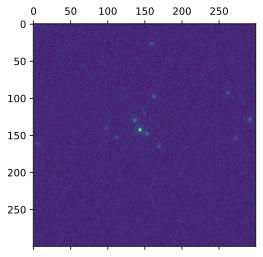

In [143]:
with fits.open(fits_file_3_1) as result_file_3_1:
    result_data_3_1 = result_file_3_1[1].data

crop_result_data_3_1 = result_data_3_1 [1900:2200, 1900:2200]

fig_3_1 = plt.figure()
im_3_1 = plt.matshow(crop_result_data_3_1)

## Observation III.2

In [144]:
offset_3_2 = {
          'offset_id': 1,
          'offset_centre': False,
          'offset_ra': 0.0,
          'offset_dec': 0.0,
          'offset_pa': 0.0
         }


residuals_3_2 = {
             'residual_flat': False,
             'residual_dark': False,
             'residual_cosmic': False,
             'residual_poisson': False,
             'residual_readnoise': False
            }


observation_parameters_3_2 = {
                          'instrument': 'WFI',
                          'filters': ['F129'],
                          'detectors': 1,
                          'distortion': False,
                          'background': 0.15,
                          'observations_id': 1,
                          'exptime': 15000,
                          'offsets': [offset]
                         }

obm_3_2 = ObservationModule(observation_parameters, out_prefix=obs_prefix, ra=obs_ra, dec=obs_dec, residual=residuals)

obm_3_2.nextObservation()

2022-11-05 14:26:11,677 INFO: Got offsets as [{'offset_id': 1, 'offset_centre': False, 'offset_ra': 0.0, 'offset_dec': 0.0, 'offset_pa': 0.0}]
2022-11-05 14:26:11,712 INFO: Adding observation with filter F129 and offset (0.0,0.0,0.0)
2022-11-05 14:26:11,713 INFO: Added 1 observations
2022-11-05 14:26:11,715 INFO: WFI with 1 detectors. Central offset (0.0, 0.0, 0.0)
2022-11-05 14:26:11,716 INFO: Initializing Observation 0 of 1
2022-11-05 14:26:11,716 INFO: Observation Filter is F129
2022-11-05 14:26:11,717 INFO: Observation (RA,DEC) = (150.0,-2.5) with PA=0.0
2022-11-05 14:26:11,717 INFO: Resetting
2022-11-05 14:26:11,718 INFO: Returning background 0.15.
2022-11-05 14:26:11,719 INFO: Creating Detector SCA01 with (RA,DEC,PA) = (150.0,-2.5,0.0)
2022-11-05 14:26:11,720 INFO: Creating Detector SCA01 with offset (0.0,0.0)
2022-11-05 14:26:11,771 INFO: Creating Instrument with Configuration {'aperture': 'imaging', 'disperser': None, 'filter': 'f129', 'instrument': 'wfi', 'mode': 'imaging'}


Creating pandeia instrument roman.wfi.imaging


2022-11-05 14:26:11,985 INFO: SCA01: (RA, DEC, PA) := (150.0, -2.5, 0.0), detected as (150.0, -2.5, 0.0)
2022-11-05 14:26:11,986 INFO: Detector SCA01 created
2022-11-05 14:26:11,987 INFO: Reset Instrument


0

In [145]:
output_stellar_catalogues_3_2 = obm_3_2.addCatalogue(stellar_cat_file)
output_galaxy_catalogues_3_2 = obm_3_2.addCatalogue(galaxy_cat_file)

psf_file_3_2 = obm_3_2.addError()

fits_file_3_2, mosaic_file_3_2, params_3_2 = obm_3_2.finalize(mosaic=False)

2022-11-05 14:26:13,127 INFO: Running catalogue /Users/halkowsi/STScI-STIPS/notebooks/adv_notebook_stars_000.fits
2022-11-05 14:26:13,129 INFO: Adding catalogue /Users/halkowsi/STScI-STIPS/notebooks/adv_notebook_stars_000.fits
2022-11-05 14:26:13,149 INFO: Converting phoenix catalogue
2022-11-05 14:26:13,150 INFO: Preparing output table
2022-11-05 14:26:13,180 INFO: Converting chunk 2
2022-11-05 14:26:13,181 INFO: Converting Phoenix Table to Internal format
2022-11-05 14:26:13,182 INFO: 1 datasets
2022-11-05 14:26:13,600 INFO: Finished converting catalogue to internal format
2022-11-05 14:26:13,601 INFO: Adding catalogue to detector SCA01
2022-11-05 14:26:13,602 INFO: Adding catalogue adv_notebook_stars_000_01_conv_F129.fits to AstroImage SCA01
2022-11-05 14:26:13,657 INFO: Determining pixel co-ordinates
2022-11-05 14:26:13,659 INFO: Keeping 45 items
2022-11-05 14:26:13,659 INFO: Writing 45 stars
2022-11-05 14:26:13,660 INFO: Adding 45 point sources to AstroImage SCA01
2022-11-05 14:26

2022-11-05 14:26:34,059 INFO: Added catalogue adv_notebook_gals_000_01_conv_F129.fits to AstroImage SCA01
2022-11-05 14:26:34,060 INFO: Finished catalogue /Users/halkowsi/STScI-STIPS/notebooks/adv_notebook_gals_000.fits
2022-11-05 14:26:34,060 INFO: Adding Error
2022-11-05 14:26:34,061 INFO: Adding residual error
2022-11-05 14:26:34,062 INFO: Adding error to detector SCA01
2022-11-05 14:26:34,063 INFO: Adding background
2022-11-05 14:26:34,064 INFO: Returning background 0.15.
2022-11-05 14:26:34,064 INFO: Background is 0.15 counts/s/pixel
2022-11-05 14:26:34,065 INFO: Returning background 0.15.
2022-11-05 14:26:34,066 INFO: Added background of 0.15 counts/s/pixel
2022-11-05 14:26:34,075 INFO: Inserting correct exposure time
2022-11-05 14:26:34,076 INFO: Cropping Down to base Detector Size
2022-11-05 14:26:34,077 INFO: Cropping convolved image down to detector size
2022-11-05 14:26:34,078 INFO: Taking [22:4110, 22:4110]
2022-11-05 14:26:34,098 INFO: SCA01: (RA, DEC, PA) := (150.0, -2.5,

<Figure size 432x288 with 0 Axes>

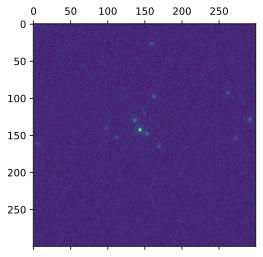

In [147]:
with fits.open(fits_file_3_2) as result_file_3_2:
    result_data_3_2 = result_file_3_2[1].data

crop_result_data_3_2 = result_data_3_2[1900:2200, 1900:2200]

fig_3_2 = plt.figure()
im_3_2 = plt.matshow(crop_result_data_3_2)

## Observation III.3

In [148]:
offset_3_3 = {
          'offset_id': 1,
          'offset_centre': False,
          'offset_ra': 0.0,
          'offset_dec': 0.0,
          'offset_pa': 0.0
         }


residuals_3_3 = {
             'residual_flat': False,
             'residual_dark': False,
             'residual_cosmic': False,
             'residual_poisson': False,
             'residual_readnoise': False
            }


observation_parameters_3_3 = {
                          'instrument': 'WFI',
                          'filters': ['F129'],
                          'detectors': 1,
                          'distortion': False,
                          'background': 0.15,
                          'observations_id': 1,
                          'exptime': 100,
                          'offsets': [offset]
                         }

obm_3_3 = ObservationModule(observation_parameters, out_prefix=obs_prefix, ra=obs_ra, dec=obs_dec, residual=residuals)

obm_3_3.nextObservation()

2022-11-05 14:27:08,686 INFO: Got offsets as [{'offset_id': 1, 'offset_centre': False, 'offset_ra': 0.0, 'offset_dec': 0.0, 'offset_pa': 0.0}]
2022-11-05 14:27:08,722 INFO: Adding observation with filter F129 and offset (0.0,0.0,0.0)
2022-11-05 14:27:08,723 INFO: Added 1 observations
2022-11-05 14:27:08,725 INFO: WFI with 1 detectors. Central offset (0.0, 0.0, 0.0)
2022-11-05 14:27:08,726 INFO: Initializing Observation 0 of 1
2022-11-05 14:27:08,726 INFO: Observation Filter is F129
2022-11-05 14:27:08,727 INFO: Observation (RA,DEC) = (150.0,-2.5) with PA=0.0
2022-11-05 14:27:08,728 INFO: Resetting
2022-11-05 14:27:08,728 INFO: Returning background 0.15.
2022-11-05 14:27:08,729 INFO: Creating Detector SCA01 with (RA,DEC,PA) = (150.0,-2.5,0.0)
2022-11-05 14:27:08,729 INFO: Creating Detector SCA01 with offset (0.0,0.0)
2022-11-05 14:27:08,780 INFO: Creating Instrument with Configuration {'aperture': 'imaging', 'disperser': None, 'filter': 'f129', 'instrument': 'wfi', 'mode': 'imaging'}


Creating pandeia instrument roman.wfi.imaging


2022-11-05 14:27:08,993 INFO: SCA01: (RA, DEC, PA) := (150.0, -2.5, 0.0), detected as (150.0, -2.5, 0.0)
2022-11-05 14:27:08,994 INFO: Detector SCA01 created
2022-11-05 14:27:08,995 INFO: Reset Instrument


0

In [149]:
output_stellar_catalogues_3_3 = obm_3_3.addCatalogue(stellar_cat_file)
output_galaxy_catalogues_3_3 = obm_3_3.addCatalogue(galaxy_cat_file)

psf_file_3_3 = obm_3_3.addError()

fits_file_3_3, mosaic_file_3_3, params_3_3 = obm_3_3.finalize(mosaic=False)

2022-11-05 14:27:11,578 INFO: Running catalogue /Users/halkowsi/STScI-STIPS/notebooks/adv_notebook_stars_000.fits
2022-11-05 14:27:11,580 INFO: Adding catalogue /Users/halkowsi/STScI-STIPS/notebooks/adv_notebook_stars_000.fits
2022-11-05 14:27:11,598 INFO: Converting phoenix catalogue
2022-11-05 14:27:11,598 INFO: Preparing output table
2022-11-05 14:27:11,631 INFO: Converting chunk 2
2022-11-05 14:27:11,632 INFO: Converting Phoenix Table to Internal format
2022-11-05 14:27:11,633 INFO: 1 datasets
2022-11-05 14:27:11,991 INFO: Finished converting catalogue to internal format
2022-11-05 14:27:11,991 INFO: Adding catalogue to detector SCA01
2022-11-05 14:27:11,992 INFO: Adding catalogue adv_notebook_stars_000_01_conv_F129.fits to AstroImage SCA01
2022-11-05 14:27:12,044 INFO: Determining pixel co-ordinates
2022-11-05 14:27:12,044 INFO: Keeping 45 items
2022-11-05 14:27:12,045 INFO: Writing 45 stars
2022-11-05 14:27:12,046 INFO: Adding 45 point sources to AstroImage SCA01
2022-11-05 14:27

2022-11-05 14:27:33,047 INFO: Added catalogue adv_notebook_gals_000_01_conv_F129.fits to AstroImage SCA01
2022-11-05 14:27:33,048 INFO: Finished catalogue /Users/halkowsi/STScI-STIPS/notebooks/adv_notebook_gals_000.fits
2022-11-05 14:27:33,049 INFO: Adding Error
2022-11-05 14:27:33,050 INFO: Adding residual error
2022-11-05 14:27:33,050 INFO: Adding error to detector SCA01
2022-11-05 14:27:33,051 INFO: Adding background
2022-11-05 14:27:33,051 INFO: Returning background 0.15.
2022-11-05 14:27:33,052 INFO: Background is 0.15 counts/s/pixel
2022-11-05 14:27:33,053 INFO: Returning background 0.15.
2022-11-05 14:27:33,054 INFO: Added background of 0.15 counts/s/pixel
2022-11-05 14:27:33,063 INFO: Inserting correct exposure time
2022-11-05 14:27:33,064 INFO: Cropping Down to base Detector Size
2022-11-05 14:27:33,065 INFO: Cropping convolved image down to detector size
2022-11-05 14:27:33,066 INFO: Taking [22:4110, 22:4110]
2022-11-05 14:27:33,085 INFO: SCA01: (RA, DEC, PA) := (150.0, -2.5,

In [150]:
with fits.open(fits_file_3_3) as result_file_3_3:
    result_data_3_3 = result_file_3_3[1].data

crop_result_data_3_3 = result_data_3_3[1900:2200, 1900:2200]

fig_3_3 = plt.figure()
im_3_3 = plt.matshow(crop_result_data_3_3)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/halkowsi/STScI-STIPS/notebooks/adv_notebook_1_0.fits'

## Conclusion

This concludes the first portion of the advanced tutorial.  For information on PSFs, please see STIPS Advanced II.  If you have further questions, check out the [STIPS documentation](https://stips.readthedocs.io/en/latest/), or reach out to the STIPS Helpdesk via email at help@stsci.edu with the subject line "STIPS Question".